# Questão 4

Considere o processo de identificação de aglomerados (“clusters”) com base em uma técnica hierárquica aglomerativa. Neste problema considere o método de Ward resumido abaixo. Considere também dois critérios para parada do processo aglomerativo no dendograma e identificação do número de aglomerados. O critério $R^{2}$ e o critério do Pseudo $T^{2}$ . Para o problema considere a tabela de índices de desenvolvimento de países(Fonte: ONU-2002, Livro – Análise de dados através de métodos de estatística multivariada – Sueli A.Mingoti).



In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0.88,0.90,0.90,0.87,0.93,0.89,0.88,0.81,0.82,0.85,0.77,0.71,0.75,0.70,0.44,0.47,0.23,0.34,0.31,0.24,0.76]) #Atributo 1
x2 = np.array([0.99,0.99,0.98,0.98,0.93,0.97,0.87,0.92,0.92,0.90,0.85,0.83,0.83,0.62,0.58,0.37,0.33,0.36,0.35,0.37,0.80])
x3 = np.array([0.91,0.93,0.94,0.97,0.93,0.92,0.91,0.80,0.75,0.64,0.69,0.72,0.63,0.60,0.37,0.45,0.27,0.51,0.32,0.36,0.61])
x4 = np.array([1.10,1.26,1.24,1.18,1.20,1.04,1.41,0.55,1.05,0.07,-1.36,0.47,-0.87,0.21,-1.36,-0.68,-1.26,-1.98,-0.55,0.20,0.39])

dados = []
for i,j,k,l in zip(x1,x2,x3,x4):
    dados.append([i,j,k,l])
dados = np.array(dados)
print(dados)

[[ 0.88  0.99  0.91  1.1 ]
 [ 0.9   0.99  0.93  1.26]
 [ 0.9   0.98  0.94  1.24]
 [ 0.87  0.98  0.97  1.18]
 [ 0.93  0.93  0.93  1.2 ]
 [ 0.89  0.97  0.92  1.04]
 [ 0.88  0.87  0.91  1.41]
 [ 0.81  0.92  0.8   0.55]
 [ 0.82  0.92  0.75  1.05]
 [ 0.85  0.9   0.64  0.07]
 [ 0.77  0.85  0.69 -1.36]
 [ 0.71  0.83  0.72  0.47]
 [ 0.75  0.83  0.63 -0.87]
 [ 0.7   0.62  0.6   0.21]
 [ 0.44  0.58  0.37 -1.36]
 [ 0.47  0.37  0.45 -0.68]
 [ 0.23  0.33  0.27 -1.26]
 [ 0.34  0.36  0.51 -1.98]
 [ 0.31  0.35  0.32 -0.55]
 [ 0.24  0.37  0.36  0.2 ]
 [ 0.76  0.8   0.61  0.39]]


# Funções usadas

In [3]:
def centro(pontos):
    '''Calcula centróide de um conjunto de pontos.'''
    if len(pontos)==0:
        return []
    centroide = []
    pontos=np.array(pontos)
    for i in range(len(pontos[0])):
        soma = 0
        for j in range(len(pontos)):
            soma += pontos[j][i]
        centroide.append(soma/len(pontos)) 
    return np.array(centroide)


def menorLimiar(matriz, limiar_inf=0):
    '''Menor valor de uma matriz de reais positivos que é maior que um 
    determinado limiar inferior. O valor retornado é alterado na matriz para
    np.max(matriz)+1, preparando para a próxima vez que esta função é 
    executada.'''
    
    list_menor = []
    list_ind = []  # Índice impossível na matriz, np.unravel_index(np.argmin(matriz,axis=None), matriz.shape)
    n = len(matriz[0])-1
    for vez in range(n*(n+1)//2):
        menor = np.max(matriz) # valor impossível
        ind = (-1,-1)
        for i in range(len(matriz)):        # Percorrendo todos
            for j in range(len(matriz[0])): # elementos da matriz
                if i<j:  # Se está acima da diagonal principal
                    val = matriz[i][j]
                    if val<=menor and val>limiar_inf:
                        menor = val 
                        ind = (i,j)
                        
        if ind!=(-1,-1):
            list_menor.append(menor)
            list_ind.append(ind)
            matriz[list_ind[-1][0]][list_ind[-1][1]] = matriz[list_ind[-1][1]][list_ind[-1][0]] = np.max(matriz)+1
    return list_menor, list_ind


def R(clusters):
    media_glob = np.zeros(len(clusters[0][0]))
    qtd_pto = 0
    
    for c in clusters:  # para cada cluster em 'clusters'
        for ponto in c: # para cada ponto em clusters
            media_glob+=ponto
            qtd_pto+=1
    media_glob = media_glob/qtd_pto
    centros = []  # lista com centroides de todos aglomerados
    for a in clusters:
        centros.append(centro(a))
    SSB = 0
    for i in range(len(clusters)):
        SSB += len(clusters[i])*np.dot(centros[i]-media_glob,centros[i]-media_glob)
    
    SST = 0
    for a in clusters:  # para cada Aglomerado em 'clusters'
        c = centro(a) # centróides
        for p in a:  # para cada Ponto do aglomerado
            SST += np.dot(p-c, p-c)
    return (SSB/SST)**2


def dist_aglom(clust):
    '''Calcula distância entre todos aglomerados.'''
    cent = []  # lista com centroides de todos aglomerados
    for a in clust:
        cent.append(centro(a))
    cent = np.array(cent)
    tam = len(clust)  # ordem da matriz com distâncias
    distancias = np.zeros((tam, tam))
    for i in range(tam):
        for j in range(tam):
            if i<j:
                tami = len(clust[i]); tamj = len(clust[j])
                distancias[i][j] = (tami*tamj)/(tami+tamj)*np.dot(cent[i]-cent[j], cent[i]-cent[j])
            elif i>j:
                distancias[i][j] = distancias[j][i]
    return distancias


def uniao(clusters, indices):
    '''Une um par de clusters presentes numa lista com vários outros.'''
    clusters = np.array(clusters)  # Para garantir bom funcionamento
    unidos = []  # Lista com clusters unidos
    ind_unidos = []  # Lista com índices dos clusters já unidos
    for x,y in indices:
        if x not in ind_unidos and y not in ind_unidos:
            ind_unidos.append(x); ind_unidos.append(y)
            unidos.append(np.append(clusters[x], clusters[y], axis=0))  # lista com novo clusters unidos
    
    # Recuperando clusters não unidos
    resto = []  # Lista de clusters não unidos
    for i in range(len(clusters)):
        if i not in ind_unidos:
            resto.append(clusters[i])
    
    if len(resto)!=0:
        for c in resto:
            unidos.append(c)
    
    unidos = np.array(unidos)
    return unidos

# Algoritmo Hierárquico de Ward

In [4]:
def ward(dados, iter_max):
    dados = np.array(dados)  # Pra garantir bom funcionamento
    clust = [[aglomerado] for aglomerado in dados]  # Aglomerados atuais. É atualizado a cada iteração
    clust = np.array(clust)
    coef_R, coef_T = [],[]  # R
    for iter in range(iter_max):
        distancias = dist_aglom(clust)  # Matriz de similaridade: distâncias entre aglomerados
        menores, indices = menorLimiar(distancias)  # Índice do menor elemento não nulo
        clust = uniao(clust, indices)  # Realiza união entre cada par de clusters
        coef_R.append(R(clust))
        if len(clust)==1:  #(iter>0 and coef_R[iter-1] > 3*coef_R[iter]) or; Caso haja decréscimo muito grande no R
            break
    
    return clust, coef_R


# Resultados
Em cada iteração estamos calculando o coeficiente $R^{2} = SSB/SST_{c}$. Sendo: 
$$SSB = \displaystyle\sum_{i=1}^{g_{k}}n_{i}||m_{i}-m||^2$$
$$SST_{c} = \displaystyle \sum_{i=1}^{g_{k}} \sum_{j=1}^{n_{i}} ||x_{ij}-m_{i}||^{2}$$
Legenda:
* $n_{i}$ = número de elementos no conglomerado $C_{i}$
* $m_{i}$ = centróide do conglomerado $C_{i}$
* $g_{k}$ = número de conglomerados
* m = média global

$SSB$ mede o quanto os clusters estão dispersos entre si e $SST_{c}$ mede o quando os pontos de um cluster estão unidos. São respectivamentes métricas inter-clusters e intra-clusters.

O gráfico de $R^{2}$ é sempre decrescente. 

quantidade de clusters= 1


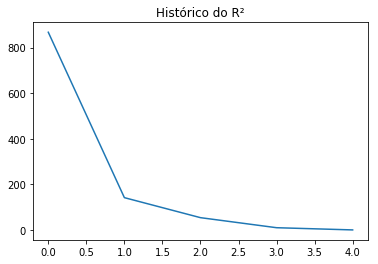

[[0.68809524 0.74952381 0.67761905 0.15761905]]


In [5]:
aglomedados, hist_R = ward(dados, 10)
print('quantidade de clusters= '+str(len(aglomedados)))
plt.plot(hist_R)
plt.title('Histórico do R²')
plt.show()

centros_result = []
for a in aglomedados:
    centros_result.append(centro(a))
centros_result = np.array(centros_result)
print(centros_result)

Vemos no gráfico de $R^{2}$ que ocorre uma variação drástica da iteração 1 para 2. Devemos executar o algoritmo até a 2ª iteração.

quantidade de clusters= 6


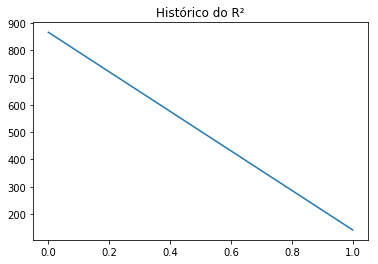

[[ 0.9         0.97        0.9425      1.22      ]
 [ 0.8675      0.9375      0.8725      1.15      ]
 [ 0.63        0.73        0.6225      0.4025    ]
 [ 0.33666667  0.42333333  0.38333333 -1.53333333]
 [ 0.575       0.6         0.5225     -0.865     ]
 [ 0.775       0.76        0.62        0.14      ]]


In [6]:
aglomedados, hist_R = ward(dados, 2)
print('quantidade de clusters= '+str(len(aglomedados)))
plt.plot(hist_R)
plt.title('Histórico do R²')
plt.show()

centros_result = []
for a in aglomedados:
    centros_result.append(centro(a))
centros_result = np.array(centros_result)
print(centros_result)